In [1]:
import os
from os import path
from datetime import datetime
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib.ticker import MaxNLocator

plt.rcParams["figure.figsize"] = (10, 5)

# sns.set_theme(style="darkgrid")

In [3]:
import seaborn as sns

In [4]:
filename = path.join('..', 'data', 'raw', 'BOLETIM_DIARIO_CORONAVIRUS_SAP.xlsx')

assert path.exists(filename), f"Caminho para o arquivo não existe:\n{filename}"

In [5]:
frame = pd.read_excel(filename,
                   index_col="DATA",
                   parse_dates=['DATA'],
                   engine='openpyxl')

In [6]:
frame.head()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,CONFIRMADOS_DIA,RECUPERADOS_DIA,DESCARTADOS_DIA,OBITOS_DIA,ATIVOS_DIA,EM_INVESTIGACAO_DIA
DATA,,,,,,,,,,,,,,,
2020-07-03,690,263,105,1058,63,38,3,35,4,0,0,0,0,0,0
2020-07-04,709,251,109,1069,65,43,3,40,4,4,2,19,0,5,-12
2020-07-05,711,252,110,1073,71,35,3,32,4,1,6,2,0,-8,1
2020-07-06,722,293,121,1136,79,38,2,36,4,11,8,11,0,3,41
2020-07-07,794,264,126,1184,85,37,4,33,4,5,6,72,0,-1,-29


In [7]:
frame.tail()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,CONFIRMADOS_DIA,RECUPERADOS_DIA,DESCARTADOS_DIA,OBITOS_DIA,ATIVOS_DIA,EM_INVESTIGACAO_DIA
DATA,,,,,,,,,,,,,,,
2021-09-29,16300,47,6905,23252,6710,43,2,41,152,7,0,18,0,7,2
2021-09-30,16323,50,6909,23282,6719,38,2,36,152,4,9,23,0,-5,3
2021-10-01,16355,58,6915,23328,6722,41,2,39,152,6,3,32,0,3,8
2021-10-02,16378,42,6923,23343,6726,45,2,43,152,8,4,23,0,4,-16
2021-10-03,16378,42,6923,23343,6731,40,2,38,152,0,5,0,0,-5,0


In [8]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 458 entries, 2020-07-03 to 2021-10-03
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   DESCARTADOS          458 non-null    int64
 1   EM INVESTIGACAO      458 non-null    int64
 2   CONFIRMADOS          458 non-null    int64
 3   EXAMINADOS           458 non-null    int64
 4   RECUPERADOS          458 non-null    int64
 5   ATIVOS               458 non-null    int64
 6   HOSPITAL             458 non-null    int64
 7   DOMICILIO            458 non-null    int64
 8   OBITOS               458 non-null    int64
 9   CONFIRMADOS_DIA      458 non-null    int64
 10  RECUPERADOS_DIA      458 non-null    int64
 11  DESCARTADOS_DIA      458 non-null    int64
 12  OBITOS_DIA           458 non-null    int64
 13  ATIVOS_DIA           458 non-null    int64
 14  EM_INVESTIGACAO_DIA  458 non-null    int64
dtypes: int64(15)
memory usage: 57.2 KB


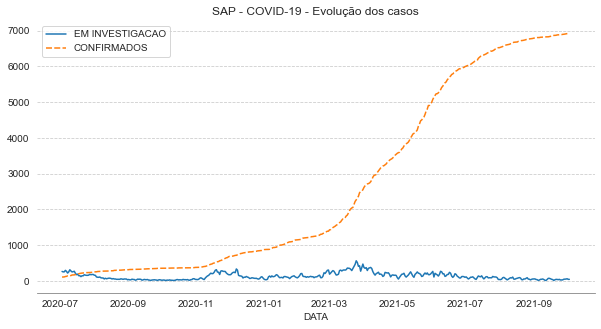

In [9]:
params = {
    'axes.facecolor' : 'white',
    'axes.titlesize' : 'larger', 
    'axes.titleweight' : 'bold',
    'axes.edgecolor': 'gray',
    "axes.grid" : True,
    "grid.linewidth": 0.9,
    'grid.linestyle': '--', 
    'axes.grid.which' : 'major'
    }
# sns.set_theme(params)
sns.set_style("whitegrid", params)
# sns.set_context("paper", rc=params)

ax = sns.lineplot(data=frame[['EM INVESTIGACAO', 'CONFIRMADOS']],
            palette="tab10"
            )

_ = ax.set_title("SAP - COVID-19 - Evolução dos casos")

ax.xaxis.grid(False)
sns.despine(left=True)

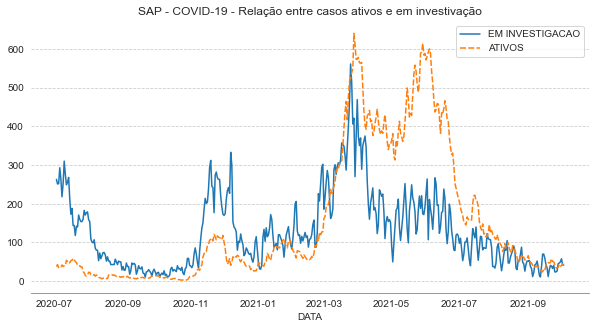

In [10]:
ax = sns.lineplot(data=frame[['EM INVESTIGACAO', 'ATIVOS']],
            palette="tab10"
            )

_ = ax.set_title("SAP - COVID-19 - Relação entre casos ativos e em investivação")

ax.xaxis.grid(False)
sns.despine(left=True)

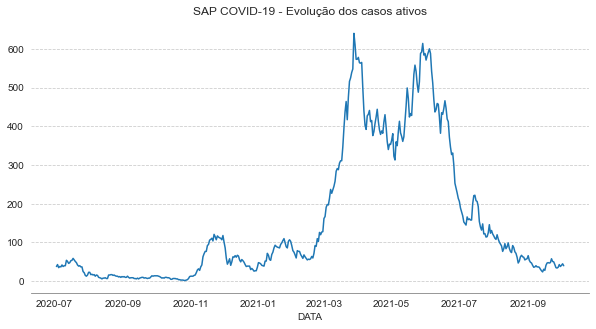

In [11]:
ax = sns.lineplot(data=frame[['ATIVOS']], legend=False)
_ = ax.set_title("SAP COVID-19 - Evolução dos casos ativos")

ax.xaxis.grid()
# ax.set_ylim([-10, 300])
sns.despine(left=True)

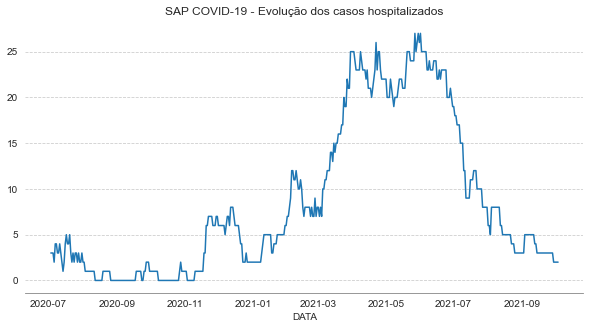

In [12]:
ax = sns.lineplot(data=frame[['HOSPITAL']],
             palette="tab10",
             legend=False
            )
_ = ax.set_title("SAP COVID-19 - Evolução dos casos hospitalizados")

# ax.set_ylim([-10, 250])
ax.xaxis.grid()
sns.despine(left=True)


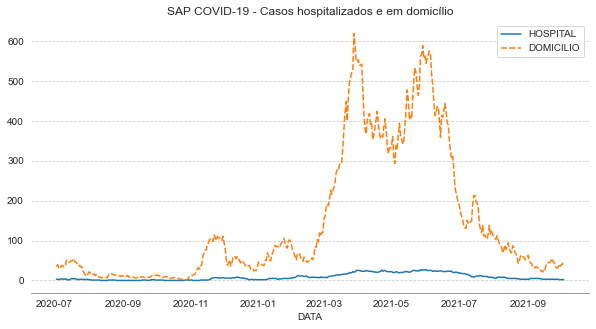

In [13]:
ax = sns.lineplot(data=frame[['HOSPITAL', 'DOMICILIO']],
             palette="tab10"
            )
_ = ax.set_title("SAP COVID-19 - Casos hospitalizados e em domicílio")

# ax.set_ylim([-10, 250])
ax.xaxis.grid()
sns.despine(left=True)

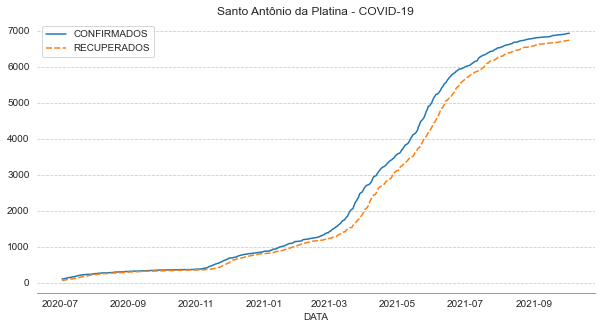

In [14]:
ax = sns.lineplot(data=frame[['CONFIRMADOS','RECUPERADOS']],
             palette="tab10"
            )
_ = ax.set_title("Santo Antônio da Platina - COVID-19")
ax.xaxis.grid()
sns.despine(left=True)

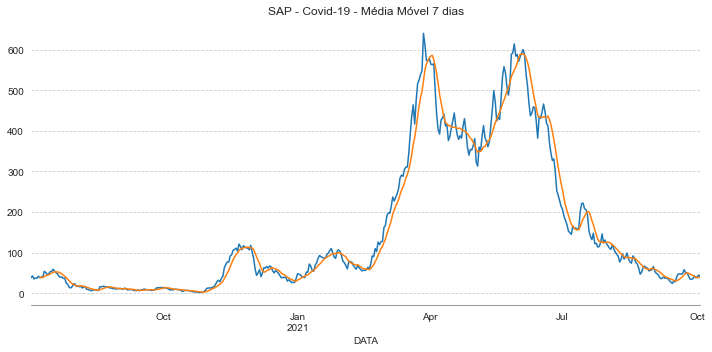

In [15]:
dias = 7

ax = frame['ATIVOS'].plot()
ax = frame['ATIVOS'].rolling(dias).mean().plot()

_ = ax.set_title(f"SAP - Covid-19 - Média Móvel {dias} dias")
ax.xaxis.grid()
sns.despine(left=True)
plt.tight_layout()

In [16]:
df = frame['RECUPERADOS'].diff(periods=1)

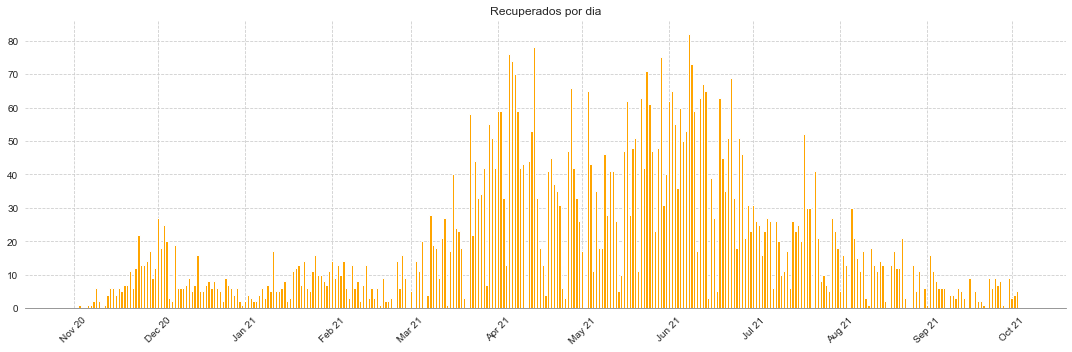

In [17]:
plt.figure(figsize=(15,5))
ax = plt.subplot()
index = df['2020-11':].index
plt.bar(index, df['2020-11':], color='orange')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
# ax.set(ylim=[0, 60])
plt.xticks(rotation=45)
_ = ax.set_title(f"Recuperados por dia")
sns.despine(left=True)
plt.tight_layout()

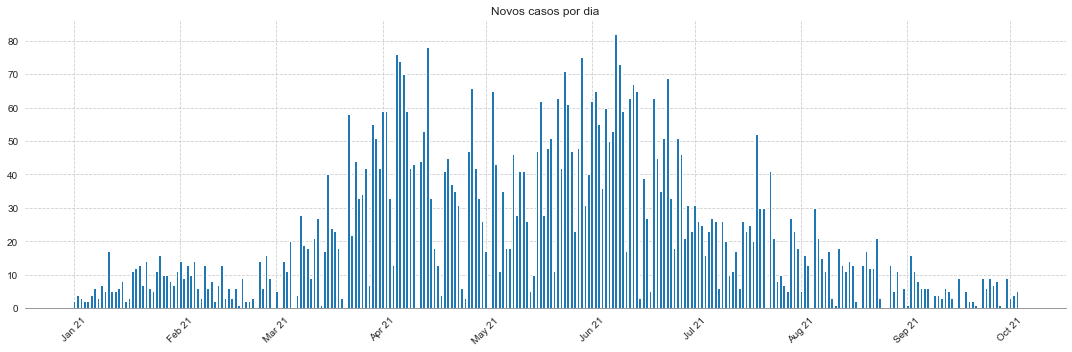

In [18]:
plt.figure(figsize=(15,5))
ax = plt.subplot()

plt.bar(df['2021':].index, df['2021':])

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
# ax.set(ylim=[0, 60])
plt.xticks(rotation=45)
_ = ax.set_title(f"Novos casos por dia")
sns.despine(left=True)
plt.tight_layout()

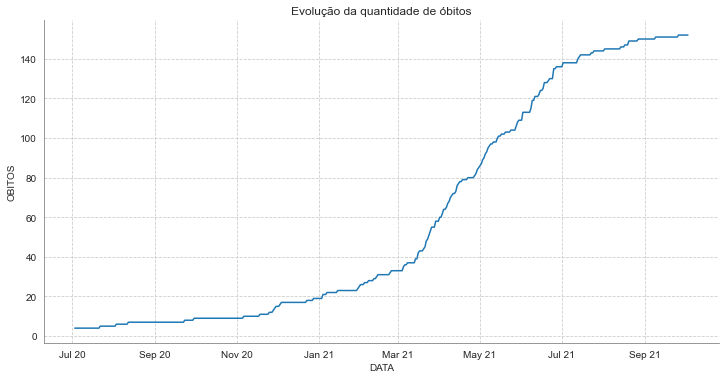

In [19]:
fig = sns.relplot(kind="line", data=frame['OBITOS'], height=5, aspect=2)
ax = fig.facet_axis(0,0)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))

# ax.set(yticks=range(4,20))

_ = ax.set(title="Evolução da quantidade de óbitos")

In [20]:
deaths = frame['OBITOS'].diff(periods=1)

deaths.head()

DATA
2020-07-03    NaN
2020-07-04    0.0
2020-07-05    0.0
2020-07-06    0.0
2020-07-07    0.0
Name: OBITOS, dtype: float64

In [21]:
groupdeaths = deaths.groupby([(deaths.index.year),(deaths.index.month)]).sum()

In [22]:
def formatter(label):
    yearDict = {
        2020 : '20',
        2021 : '21'
    }
    monthDict = {
        1:'Jan', 
        2:'Fev', 
        3:'Mar', 
        4:'Abr', 
        5:'Maio', 
        6:'Jun', 
        7:'Jul', 
        8:'Ago', 
        9:'Set', 
        10:'Out', 
        11:'Nov', 
        12:'Dez'}

    return f"{monthDict[label[1]]} {yearDict[label[0]]}"

formatter((2020, 7))

'Jul 20'

In [23]:
labels = [formatter(label) for label in groupdeaths.index]

labels

['Jul 20',
 'Ago 20',
 'Set 20',
 'Out 20',
 'Nov 20',
 'Dez 20',
 'Jan 21',
 'Fev 21',
 'Mar 21',
 'Abr 21',
 'Maio 21',
 'Jun 21',
 'Jul 21',
 'Ago 21',
 'Set 21',
 'Out 21']

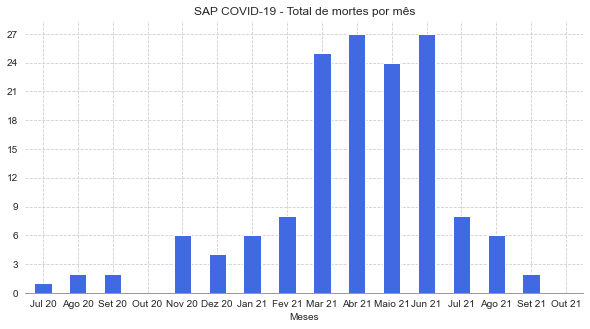

In [24]:

ax = groupdeaths.plot(kind='bar', color='royalblue')

ax.set(title='SAP COVID-19 - Total de mortes por mês')
ax.set_xticklabels(labels)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("Meses")
ax.tick_params(axis="x", rotation=0)
sns.despine(left=True)